### Enabling Colab GPU

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Importing libraries

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import cv2

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/My Drive/mps_py")

In [ ]:
import MPS_utils

### Dataset download and extraction


In [ ]:
os.environ['KAGGLE_USERNAME'] = "xxxxxxxxxxxxxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 40.1MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: 

#### Default dataset extraction

##### Dataset visualizaion

In [ ]:
original_img, reshape_img = MPS_utils.Pneumonia_img("/content/chest_xray/train/")

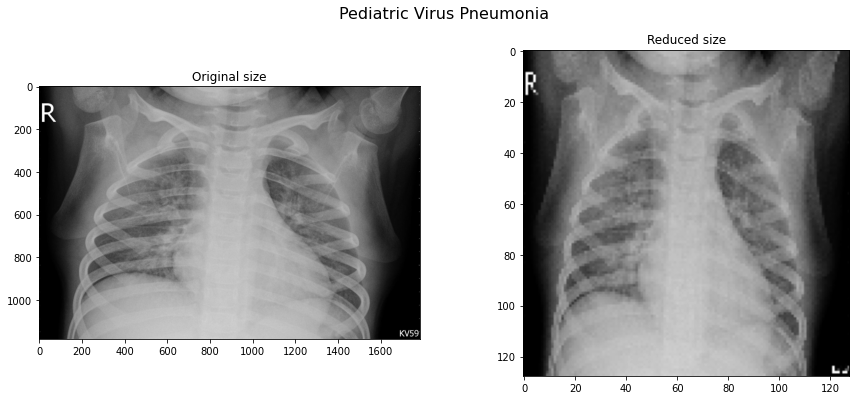

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].imshow(original_img, cmap = 'gray')
axs[0].set_title('Original size', fontsize=12)
axs[1].imshow(reshape_img, cmap = 'gray')
axs[1].set_title('Reduced size', fontsize=12)
fig.suptitle("Pediatric Virus Pneumonia", fontsize=16)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/virus_pneumonia.png')
plt.show()

#### Pneumonia VS Normal pediatric lung

In [ ]:
x_train_PN, y_train_PN = MPS_utils.extract_default_img_P_vs_N('/content/chest_xray/train/')
x_test_PN, y_test_PN = MPS_utils.extract_default_img_P_vs_N('/content/chest_xray/test/')
x_val_PN, y_val_PN = MPS_utils.extract_default_img_P_vs_N('/content/chest_xray/val/')

In [ ]:
# Preparing for reshaping and preprocessing data
x_PN = np.concatenate((x_train_PN, x_test_PN, x_val_PN))
y_PN = np.concatenate((y_train_PN, y_test_PN, y_val_PN))

#### Bacterial Pneumonia VS Virus Pneumonia

In [ ]:
x_train_BV, y_train_BV = MPS_utils.extract_default_img_PB_vs_PV('/content/chest_xray/train/')
x_test_BV, y_test_BV = MPS_utils.extract_default_img_PB_vs_PV('/content/chest_xray/test/')
x_val_BV, y_val_BV = MPS_utils.extract_default_img_PB_vs_PV('/content/chest_xray/val/')

In [ ]:
# Preparing for reshaping and preprocessing data
x_BV = np.concatenate((x_train_BV, x_test_BV, x_val_BV))
y_BV = np.concatenate((y_train_BV, y_test_BV, y_val_BV))

### Dataset Preparation

### Pneumonia VS Normal lung

In [ ]:
# Preprocessing
PN_x_train, PN_y_train, PN_x_test, PN_y_test = MPS_utils.X_rays_preprocessing(x_PN, y_PN)

In [ ]:
# Training
fit_histo = MPS_utils.MPS_training(train_dim=PN_x_train.shape[1], label_one_dim=PN_y_train.shape[1], bond_dim=20,
                                   training_set = PN_x_train, training_label = PN_y_train, 
                                   test_set = PN_x_test, test_label = PN_y_test,
                                   batch_size = 10, epochs = 100, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001, beta_1=0.9, beta_2=0.999, epsilon=0.008))

Epoch 1/100
440/440 [==============================] - 62s 135ms/step - loss: 0.6378 - accuracy: 0.6404 - val_loss: 0.4463 - val_accuracy: 0.7609
Epoch 2/100
440/440 [==============================] - 60s 137ms/step - loss: 0.3697 - accuracy: 0.8270 - val_loss: 0.2712 - val_accuracy: 0.8777
Epoch 3/100
440/440 [==============================] - 60s 136ms/step - loss: 0.2488 - accuracy: 0.8987 - val_loss: 0.3033 - val_accuracy: 0.9249
Epoch 4/100
440/440 [==============================] - 60s 136ms/step - loss: 0.2672 - accuracy: 0.9030 - val_loss: 0.1787 - val_accuracy: 0.9249
Epoch 5/100
440/440 [==============================] - 60s 136ms/step - loss: 0.2146 - accuracy: 0.9220 - val_loss: 0.2029 - val_accuracy: 0.9112
Epoch 6/100
440/440 [==============================] - 60s 136ms/step - loss: 0.2175 - accuracy: 0.9106 - val_loss: 0.1553 - val_accuracy: 0.9399
Epoch 7/100
440/440 [==============================] - 60s 136ms/step - loss: 0.2286 - accuracy: 0.9132 - val_loss: 0.1740 -

In [ ]:
# saving results as dataframe
histo_df = pd.DataFrame(fit_histo.history)
histo_df.to_csv('PN_histo_x_ray_batch10_epochs100.csv')
!cp PN_histo_x_ray_batch10_epochs100.csv "drive/My Drive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/"

Results visualization

In [ ]:
histo_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.546648,0.723133,0.446281,0.760929
1,0.333650,0.857468,0.271154,0.877732
2,0.255085,0.892304,0.303343,0.924863
3,0.246318,0.911430,0.178676,0.924863
4,0.212710,0.920310,0.202874,0.911202


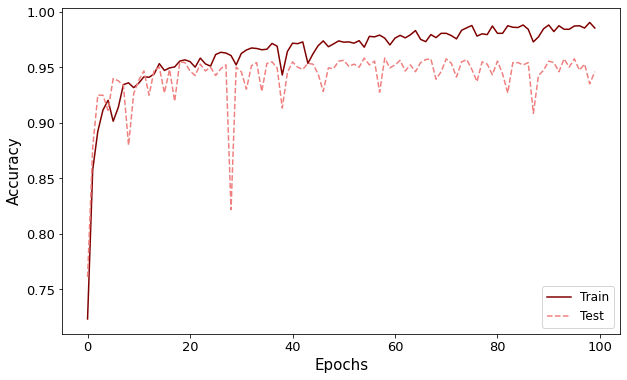

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(histo_df['accuracy'], color = "maroon", label = 'Train')
plt.plot(histo_df['val_accuracy'], color = "lightcoral", linestyle = 'dashed', label = 'Test')
plt.ylabel('Accuracy', size = 15)
plt.xlabel('Epochs', size = 15)
plt.legend(loc = "lower right", prop = {'size': 12})
plt.tick_params(labelsize = 13)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/PN_classification.png')
plt.show()

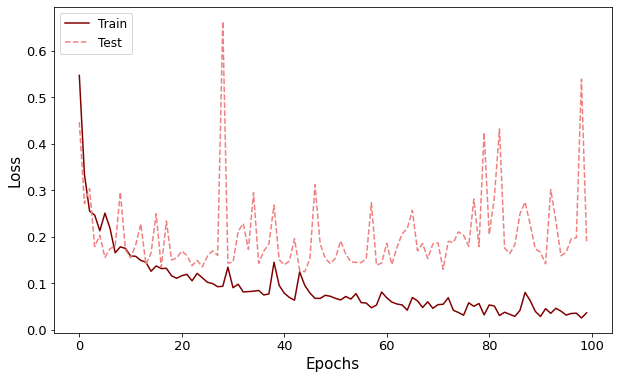

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(histo_df['loss'], color = "maroon", label = 'Train')
plt.plot(histo_df['val_loss'], color = "lightcoral", linestyle = 'dashed', label = 'Test')
plt.ylabel('Loss', size = 15)
plt.xlabel('Epochs', size = 15)
plt.legend(loc = "upper left", prop = {'size': 12})
plt.tick_params(labelsize = 13)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/PN_loss.png')
plt.show()

### Pneumonia Virus VS Pneumonia bacterial lung

In [ ]:
# Preprocessing
BV_x_train, BV_y_train, BV_x_test, BV_y_test = MPS_utils.X_rays_preprocessing(x_BV, y_BV)

In [ ]:
# Training
fit_histo_BV = MPS_utils.MPS_training(train_dim=BV_x_train.shape[1], label_one_dim=BV_y_train.shape[1], bond_dim=20,
                                   training_set = BV_x_train, training_label = BV_y_train, 
                                   test_set = BV_x_test, test_label = BV_y_test,
                                   batch_size = 10, epochs = 100, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001, beta_1=0.9, beta_2=0.999, epsilon=0.008))

Epoch 1/100
321/321 [==============================] - 44s 130ms/step - loss: 0.6780 - accuracy: 0.6603 - val_loss: 0.6223 - val_accuracy: 0.6455
Epoch 2/100
321/321 [==============================] - 42s 131ms/step - loss: 0.6138 - accuracy: 0.6668 - val_loss: 0.6235 - val_accuracy: 0.6455
Epoch 3/100
321/321 [==============================] - 43s 134ms/step - loss: 0.6098 - accuracy: 0.6728 - val_loss: 0.5732 - val_accuracy: 0.7222
Epoch 4/100
321/321 [==============================] - 44s 136ms/step - loss: 0.6008 - accuracy: 0.7069 - val_loss: 0.5884 - val_accuracy: 0.7119
Epoch 5/100
321/321 [==============================] - 44s 136ms/step - loss: 0.5647 - accuracy: 0.7237 - val_loss: 0.5619 - val_accuracy: 0.7268
Epoch 6/100
321/321 [==============================] - 44s 136ms/step - loss: 0.5636 - accuracy: 0.7320 - val_loss: 0.6026 - val_accuracy: 0.7306
Epoch 7/100
321/321 [==============================] - 44s 136ms/step - loss: 0.5513 - accuracy: 0.7334 - val_loss: 0.5428 -

In [ ]:
BV_histo_df = pd.DataFrame(fit_histo_BV.history)
BV_histo_df.to_csv('BV_histo_x_ray_batch10_epochs100.csv')
!cp BV_histo_x_ray_batch10_epochs100.csv "drive/My Drive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/"

Results visualization

In [ ]:
BV_histo_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.659337,0.652310,0.622286,0.645463
1,0.617524,0.672285,0.623549,0.645463
2,0.597084,0.691323,0.573153,0.722170
3,0.585938,0.717228,0.588409,0.711880
4,0.570682,0.720974,0.561927,0.726848


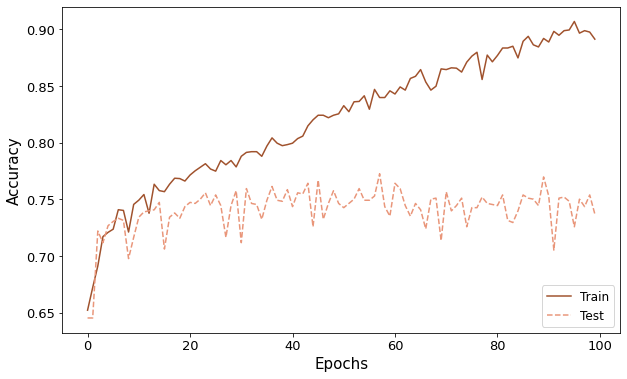

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(BV_histo_df['accuracy'], color = "sienna", label = 'Train')
plt.plot(BV_histo_df['val_accuracy'], color = "darksalmon", linestyle = 'dashed', label = 'Test')
plt.ylabel('Accuracy', size = 15)
plt.xlabel('Epochs', size = 15)
plt.legend(loc = "lower right", prop = {'size': 12})
plt.tick_params(labelsize = 13)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/BV_classification.png')
plt.show()

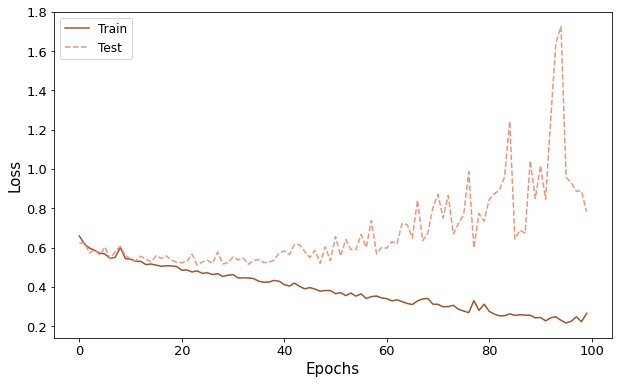

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(BV_histo_df['loss'], color = "sienna", label = 'Train')
plt.plot(BV_histo_df['val_loss'], color = "darksalmon", linestyle = 'dashed', label = 'Test')
plt.ylabel('Loss', size = 15)
plt.xlabel('Epochs', size = 15)
plt.legend(loc = "upper left", prop = {'size': 12})
plt.tick_params(labelsize = 13)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/Pediatric_chest_X_rays/BV_loss.png')
plt.show()